<a href="https://colab.research.google.com/github/Munniz1309/audioBotao/blob/main/TrabalhoAudioWav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

In [ ]:
# Carregando o arquivo de áudio
y, sr = librosa.load('/content/botao.wav')

In [ ]:
# Executando o rastreador de batidas padrão
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(f'{tempo:.2f} batidas por minuto')

136.00 batidas por minuto


**1-) Gere o gráfico deste sinal de áudio [plot].**

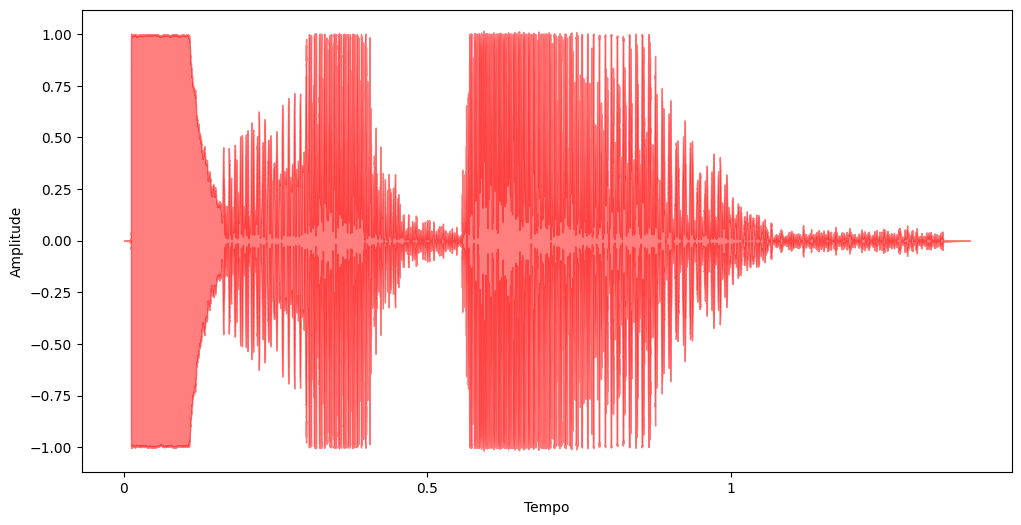

In [ ]:
# Exibindo o formato da onda do áudio
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, color='r', alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.show()

**2-) Gere o histograma do sinal de áudio [hist] usando 50 barras.**

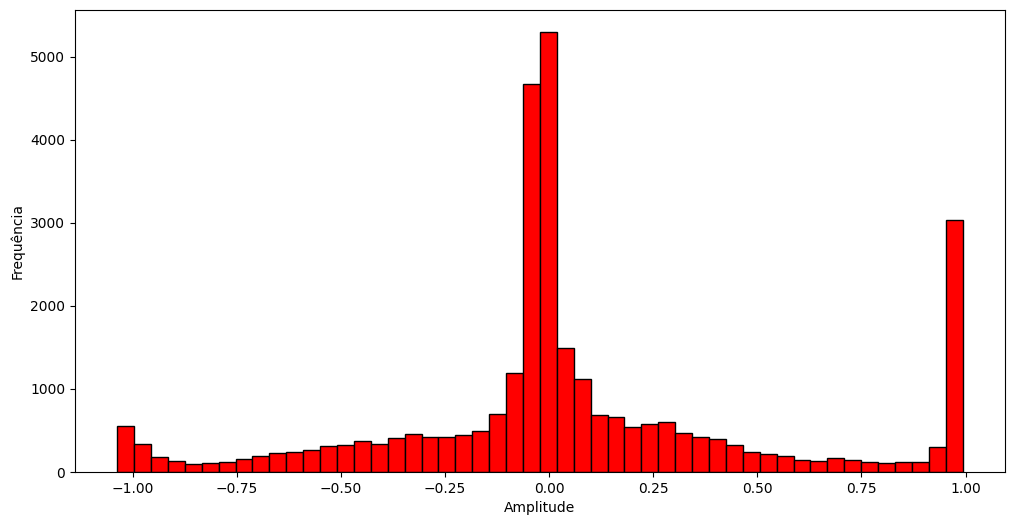

In [ ]:
# Calculando o gráfico de barras do sinal de áudio
hist, bins = np.histogram(y, bins=50)

# Plotar o Histograma do Sinal de Áudio
plt.figure(figsize=(12, 6))
plt.bar(bins[:-1], hist, width=np.diff(bins), edgecolor='black', color='r')
plt.xlabel('Amplitude')
plt.ylabel('Frequência')
plt.show()

**3-) Calcule a assimetria e a curtose do sinal de áudio [skewness,kurtosis].**


In [ ]:
# Calculando a assimetria e a curtose do sinal de áudio
assimetria = skew(y)
curtose = kurtosis(y)

print(f'Assimetria do sinal de áudio: {assimetria:.2f}')
print(f'Curtose do sinal de áudio: {curtose:.2f}')

Assimetria do sinal de áudio: 0.25
Curtose do sinal de áudio: 0.37


**4-) Divida o sinal de áudio em 10 partes de aproximadamente 6.000 amostras.
Em seguida, calcule a média temporal de cada uma destas partes [mean].**


In [ ]:
# Número de partes
num_partes = 10

# Dividindo o sinal de áudio em 10 partes
partes = np.array_split(y, num_partes)

# Calculando a média temporal das 10 partes
medias = [np.mean(parte) for parte in partes]

# Verificando se a média é constante ou vai variar ao longo do tempo
if np.allclose(medias, medias[0]):
    print('A média é constante...')
else:
    print('A média varia...')

A média varia...


In [ ]:
# Mostrando a média de cada parte
for media in medias:
  print(f'Média: {media}')

Média: 0.8160586953163147
Média: 0.07108850032091141
Média: -0.029395198449492455
Média: -0.0017585336463525891
Média: 0.0009991368278861046
Média: -0.04147699847817421
Média: -0.005553240422159433
Média: 0.00042846877477131784
Média: 0.0004538634966593236
Média: -0.0016122182132676244


**5-) Ainda usando a divisão do sinal de áudio em 10 partes com 6.000 amostras
cada, calcule a função de autocorrelação de cada uma das partes do sinal,
usando 20 valores de atraso.**


In [ ]:
# Número de partes
num_partes = 10

# Definindo o atraso
num_atrasos = 20

# Dividindo o sinal de áudio em 10 partes
partes = np.array_split(y, num_partes)

# Calculando a função de autocorrelação para as 10 partes com o atraso definido
autocorrs = [np.correlate(parte, parte, mode='full')[len(parte)-1: len(parte) + num_atrasos] for parte in partes]

# Verificando se a autocorrelação é constante ou vai variar ao longo do tempo
if np.allclose(autocorrs, autocorrs[0]):
    print('A autocorrelação é constante...')
else:
    print('A autocorrelação varia...')

A autocorrelação varia...


In [ ]:
# Mostrando a autocorrelação de cada parte
for autocorrs in autocorrs:
  print(f'autocorrs: {autocorrs}')

autocorrs: [2347.8403 2347.5256 2347.037  2346.5088 2345.947  2345.4165 2344.8655
 2344.311  2343.7441 2343.1885 2342.6345 2342.0864 2341.5208 2340.9514
 2340.3777 2339.8188 2339.2642 2338.709  2338.144  2337.575  2337.0088]
autocorrs: [274.59995 274.33557 273.67264 272.63153 271.22388 269.45822 267.33704
 264.86868 262.06412 258.93512 255.48933 251.73593 247.6841  243.34828
 238.7404  233.87276 228.75108 223.38019 217.76566 211.91965 205.85594]
autocorrs: [1029.4585  1017.57654  986.9959   946.6137   901.674    852.4274
  795.9368   729.8214   656.27686  582.124    514.23755  455.55762
  404.37274  356.73657  310.14853  266.52606  230.81343  206.09654
  190.57007  179.0259   166.36084]
autocorrs: [26.410372 26.214777 25.782171 25.337055 24.958277 24.537334 23.917618
 23.068607 22.114235 21.210794 20.393175 19.568703 18.62764  17.563591
 16.474836 15.470322 14.564609 13.679501 12.73518  11.730844 10.740131]
autocorrs: [1595.9663  1554.4408  1446.81    1300.7622  1135.0992   959.7133
  

**6-) Com base nas questões 4 e 5, você considera que o sinal é estacionário no
sentido amplo?**


A variação média temporal e a autocorrelação entre as partes do sinal do áudio sugere que não há uma constância, ou seja, a média e a autocorrelação varia ao longo do tempo, isso significa que existe uma falta de estacionariedade, pois a estacionariedade necessita que as propriedades estatísticas do sinal precisam ser constantes ao longo do tempo. Portanto, pode-se concluir que o sinal de áudio não é estacionário no sentido amplo.




